# <center>Team AM6 Unsupervised Machine Learning Predict</center>

Team AM6_JHB Unsupervised learning team members: 
* Mathew
* Yusuf
* Thandokuhle
* Tawanda
* Tiyani
* Maureen
     

![image.png](https://manofmany.com/wp-content/uploads/2020/04/Veboli-new-2.jpg)

# Start Comet experiment

In [1]:
pip install comet_ml

Note: you may need to restart the kernel to use updated packages.


In [2]:
import comet_ml 
from comet_ml import Experiment

# Create an experiment with your api key:
experiment = Experiment(api_key="QekXFT3JOd007MeNaSyzC5AH1",
    project_name="movie-recommendation-challenge", workspace="mathew-van-wyk")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mathew-van-wyk/movie-recommendation-challenge/9f45a151d71440c58ae69b1049760122



# Table of contents:

### [1. Introduction](#introduction)

### [2. Import libaries and datasets](#libaries)

### [3. Exploratory Data Analysis](#eda)

* [Summary statistics](#sub1)
* [Visualizing the dataframes](#sub2)
* [Visualizing the null values for each dataframe](#sub3)
* [Visualizing common users](#sub4)
* [Exploring movie genres](#sub5) 
* [Exploring the movies dataframe](#sub6)
* [Word cloud](#sub7)
* [Release years](#rel8)

### [4. Prepocessing](#prep)


### [5. Modelling](#mod)

* [Content-Based Filtering Recommendation](#CB)
* [Collaborative-Based Filtering Reccomendation](#CB1)


### [6. Evaluation](#eva)
* [Hyperparameter Tuning](#HPT)

### [7. Submission](#sub)

### [8. Conclusion](#conc)


# [1. Introduction](#introduction)

Recommender systems are systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the user is most likely to purchase and are of interest. Companies like Netflix and Amazon use recommender systems to help their users to identify the correct product or movies for them.

Recommender systems are an important class of machine learning algorithms that offer relevant suggestions to users. The suggested items are as relevant to the user as possible so that the user can engage with those items: YouTube videos, news articles, online products, movie and series recommendation.

Items are ranked according to their relevancy, and the most relevant ones are shown to the user. The relevance is determined by the recommender system, mainly based on historical data. For example, If you've recently watched YouTube videos about elephants, then YouTube is going to start showing you many elephant videos with similar titles and themes. 
Recommender systems are generally divided into two main categories: collaborative filtering and content-based systems.

 
Both users and service providers have benefited from these kinds of systems. Intelligent algorithms can help viewers find great titles from tens of thousands of options. This notebook will construct a recommendation algorithm based on content and collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historic preferences.

Providing an accurate and robust solution will have immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

### [Problem Statement](#problem) 
Accurately predict unseen movie ratings gathered from thousands of users based on their historic preferences. 

The objective of this notebook is to construct a recommendation algorithm based on content and collaborative filtering, capable of accurately predicting how a user will rate a movie they have not watched yet based on their historical preference. 

# [2. Import libaries and datasets](#libaries)

In [3]:
!pip install surprise 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        
import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
import time
from surprise import SVD
from surprise import accuracy
import re
import plotly.express as px
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import PCA
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

### Loading all Necessary Data sets

In [5]:
sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
movies_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
imdb_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
genome_score = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
train_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
tags_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
links_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')

# [3. Exploratory Data Analysis](#eda)

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA is the critical process of performing initial investigations on data to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modelling or hypothesis testing task.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it, which will be done below.

### [Summary statistics](#sub1)
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data

In [6]:
## Creating a summary stats function
def Summary(df):
    return df.info()

In [7]:
Summary(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [8]:
Summary(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [9]:
Summary(tags_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [10]:
Summary(movies_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
Summary(links_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [12]:
Summary(imdb_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [13]:
Summary(genome_tags)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [14]:
Summary(genome_score)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


Most of the DataFrames have a Dtype of int64 and float64, which is an indication for numeric values. However, some DataFrames also have Dtype of an object, which is an indication of non-numeric character. The DataFrames which have a Dtype include tags_df; movies_df; imdb_df; and genome_df. 

##### Getting The shapes of our data sets

In [15]:
print('train data:',train_df.shape) 
print('test data:',test_df.shape)
print('tags data:',tags_df.shape)
print("Movies data:",movies_df.shape)
print('links data:',links_df.shape)
print('imdb data:',imdb_df.shape)
print('genome tags data:',genome_tags.shape)
print('genome scores data:',genome_score.shape)

train data: (10000038, 4)
test data: (5000019, 2)
tags data: (1093360, 4)
Movies data: (62423, 3)
links data: (62423, 3)
imdb data: (27278, 6)
genome tags data: (1128, 2)
genome scores data: (15584448, 3)


### [Visualizing the dataframes](#sub2)

In [16]:
# Created a Data Frame outlining the size of our data
dataframes = ['train_df', 'test_df', 'tags_df', 'imdb_df',
              'links_df', 'movies_df', 'genome_tags', 'genome_score']
sizes = [len(train_df), len(test_df), len(tags_df),
         len(imdb_df), len(links_df), len(movies_df),
         len(genome_tags), len(genome_score)]
total_size_df = pd.DataFrame(list(zip(dataframes, sizes)),
                             columns=['dataframe', 'sizes'])
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,imdb_df,27278
4,links_df,62423
5,movies_df,62423
6,genome_tags,1128
7,genome_score,15584448


In [17]:
total_size_df = total_size_df[total_size_df['sizes'] > 100000]
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
7,genome_score,15584448


In [18]:
new_row = {'dataframe': 'other', 'sizes': 180530}
total_size_df = total_size_df.append(new_row,
                                     ignore_index=True)
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,genome_score,15584448
4,other,180530


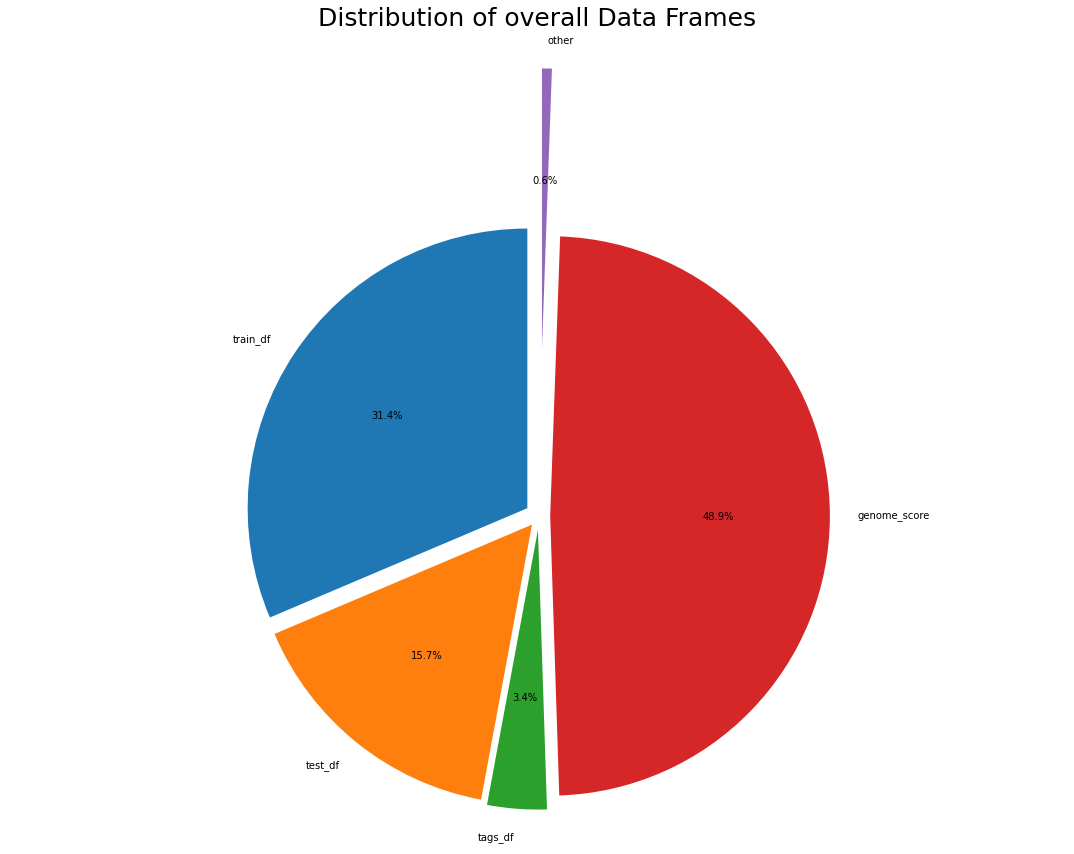

In [19]:
explodeTuple = (0.05, 0.04, 0.05, 0.04, 0.6)
fig1, ax1 = plt.subplots(figsize=(19,15))
ax1.pie(total_size_df['sizes'].values,
        labels=total_size_df['dataframe'].values,
        startangle=90, autopct='%1.1f%%',
        explode=explodeTuple)
ax1.axis('equal')
plt.title('Distribution of overall Data Frames', size=25)
plt.show()

In [20]:
len_list = [['train_df', len(train_df)], ['tags_df', len(tags_df)],
            ['imdb_df', len(imdb_df)], ['links_df', len(links_df)],
            ['movies_df', len(movies_df)],
            ['genome_tags', len(genome_tags)],
            ['genome_score', len(genome_score)]]
len_df = pd.DataFrame(len_list,
                      columns=['Dataset', 'Size'])
fig = px.bar(len_df, x=len_df['Dataset'],
             y=len_df['Size'],
             color=len_df['Dataset'],
             title='Distribution of overall Data Frames')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()


The DataFrame's that are visualised in the pie chart are the DataFrames with a size larger than 100000. The DataFrames that had a larger size than 100000 include the train_df; test_df; tags_df; genome_score and other. While the DataFrame's that had a size smaller than 100000 were combined into a DataFrame 'other', these DataFrames are imdb_df; links_df, movies_df; and genome_tags. 

In the pie chart, it is visually seen that the genome_score DataFrame size (48.9%) accounts for almost 50% of the DataFrame sizes. Followed by train_df account for 31.4%. The DataFrame with the least size is the other, with an attribute of only 0.6%.

In the bar graph, the precise unequal distribution of DataFrame sizes is evident. The genome_score DataFrame has the largest size, followed by the train_df. The difference in distribution sizes is clear, where the other DataFrame's bars aren't visually evident because of the large difference between the dimensions.

### [Visualizing the null values for each dataframe](#sub3)

In [21]:
# Obtaining the total null values in each Data Frames columns
train_count = pd.DataFrame(train_df.isnull().sum())
test_count = pd.DataFrame(test_df.isnull().sum())
tags_count = pd.DataFrame(tags_df.isnull().sum())
movies_count = pd.DataFrame(movies_df.isnull().sum())
links_count = pd.DataFrame(links_df.isnull().sum())
imdb_count = pd.DataFrame(imdb_df.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

In [22]:
train_count

,0
userId,0
movieId,0
rating,0
timestamp,0


In [23]:
test_count

,0
userId,0
movieId,0


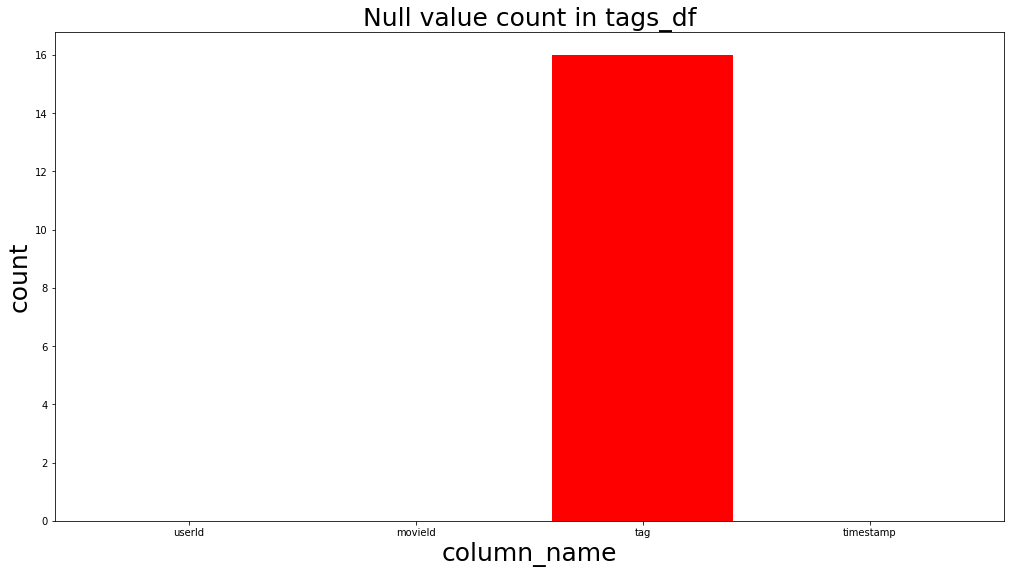

In [24]:
plt.figure(figsize=(17,9))
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='red')
plt.xlabel('column_name', size=25)
plt.ylabel('count', size=25)
plt.title('Null value count in tags_df', size=25)
plt.show()

In [25]:
movies_count

,0
movieId,0
title,0
genres,0


In [26]:
links_count

,0
movieId,0
imdbId,0
tmdbId,107


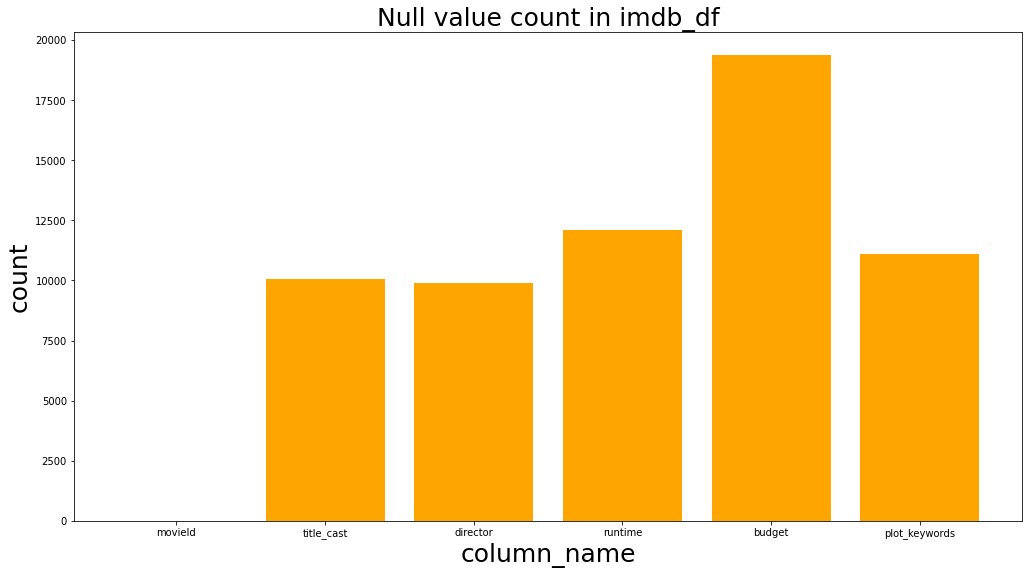

In [27]:
plt.figure(figsize=(17,9))
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='orange')
plt.xlabel('column_name', size=25)
plt.ylabel('count', size=25)
plt.title('Null value count in imdb_df', size=25)
plt.show()

It is essential to check whether your dataset has missing values. The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is critical during the preprocessing of the dataset, as many machine learning algorithms do not support missing values.

The DataFrame's with null values include the tags_df and imdb_df.
In the tags_df, the column with null values is the tag column as seen by the red bar in the Null value count in tags_df bar graph. 
In the imdb_df, there are five columns with null values, with the budget column having the most null values of over 17500. 
There are several methods for dealing with missing values. This includes:

1. Deleting Rows with missing values
2. Impute missing values for continuous variable
3. Impute missing values for categorical variable
4. Other Imputation Methods
5. Using Algorithms that support missing values
6. Prediction of missing values
7. Imputation using Deep Learning Library — Datawig

### [Visualizing common users](#sub4)

In [28]:
# To find the number of times a user rated a movie, we create a data frame with the count by userId
train_user = pd.DataFrame(
    train_df['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


In [29]:
# Grouping the users within a certain range aided us in determining the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [30]:
# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['group_one', group_one,
                         'between 1 and 50'],
                        ['group_two', group_two,
                         'between 50 and 500'],
                        ['group_three', group_three,
                         'between 500 and 1000'],
                        ['group_four', group_four,
                         'between 1000 and 1500'],
                        ['group_five', group_five,
                         'greater than 1500']])
trial_error_df = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(trial_error_df,
             x=trial_error_df["group"],
             y=trial_error_df["userId_grouping"],
             color=trial_error_df["group"],
             title='Grouped Rating Distribustion')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()
trial_error_df


,group,userId_grouping,explanation
0,group_one,110010,between 1 and 50
1,group_two,50973,between 50 and 500
2,group_three,1338,between 500 and 1000
3,group_four,159,between 1000 and 1500
4,group_five,61,greater than 1500


The user Id's are grouped by the rating counts in a grouping range illustrated in the DataFrame above.  In the Grouped Rating Distribution bar graph, it is visually displayed that there is unequal distribution.  The distribution is skewed to the left, with the majority of the user ids in the rating count range between 1 and 50. At the same time, the last group has only a value count of 61, which is a significant difference from group one with a value count of 110 010.

In [31]:
def user_ratings_count(df, n):
    plt.figure(figsize=(17,9))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=16)
    plt.xlabel('User ID', size=20)
    plt.ylabel('Number of Ratings', size=20)
    plt.show()

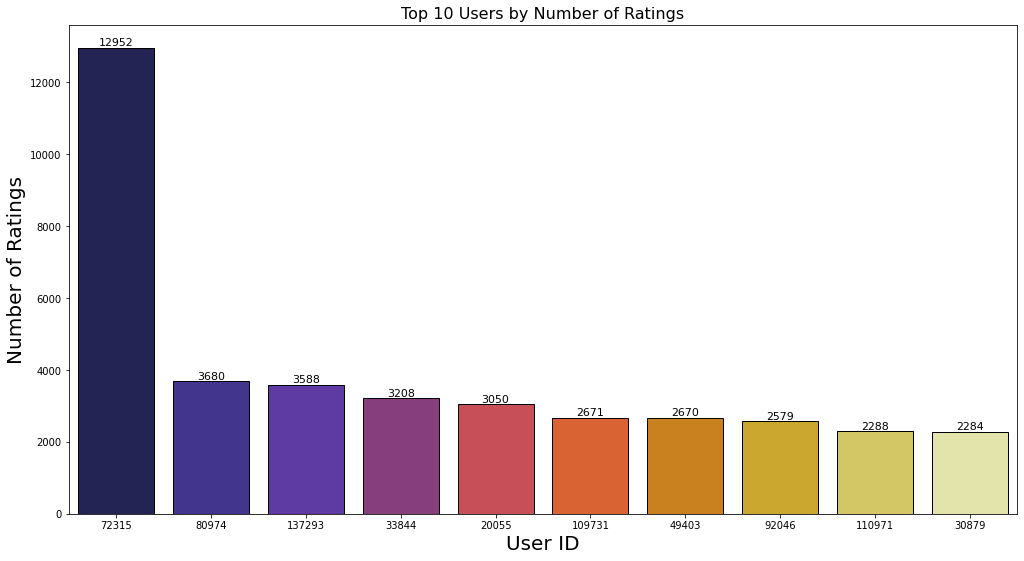

In [32]:
user_ratings_count(train_df,10)

<b color='darkslateblue'>Filtering out user 72315 because his/her number of raings is too extreme and he/she is an oulier</b>

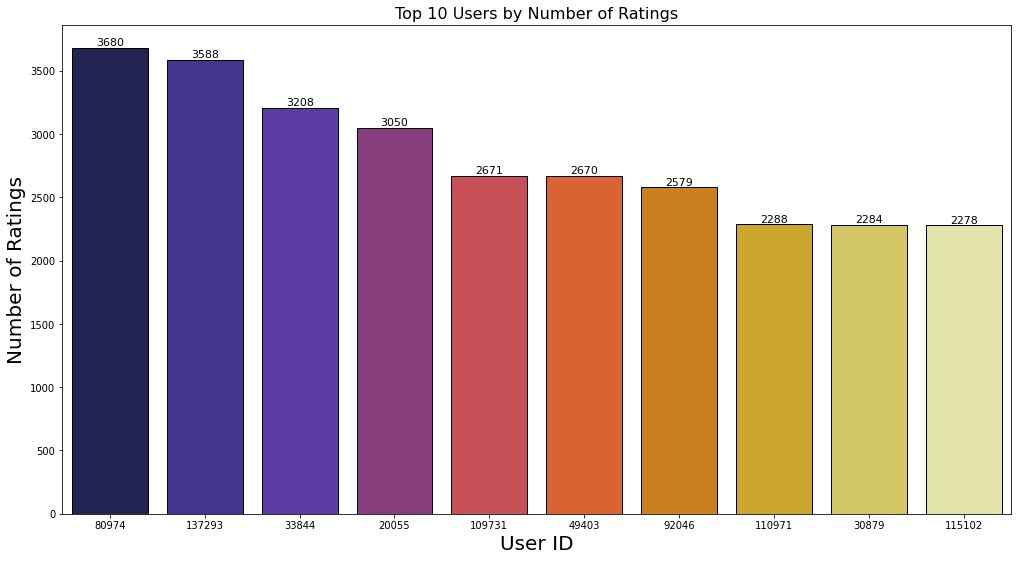

In [33]:
user_ratings_count(train_df[train_df['userId'] !=72315],10)

There are certain things which, if they are not done in the EDA phase, can affect further statistical / Machine Learning modelling. One of the things is to find outliers. Once user 72315 was removed from the top 10 users by the number of ratings, a more uniform pattern of voting is evident in the bar graph. 

In statistics, an outlier is an observation point that is distant from other observations. The definition suggests to us that an outlier is something which is an odd-one-out or the one that is different from the crowd. Some statisticians define outliers as 'having a different underlying behaviour than the rest of the data'.  Alternatively, an outlier is a data point that is distant from other points.
The Top 10 User by Number of Ratings graph that includes user 72315 is not a representation of an imbalanced dataset. An imbalanced data set in terms of machine learning is where one class label has far fewer samples compared to another class label. In this case, user 72315 deviates significantly from the rest of the users. 


From the image above we can see that the sample points in Green are close to each other, whereas the two sample points in Red are far apart from them. These red sample points are outliers.
Machine learning algorithms are sensitive to the range and distribution of attribute values. Data outliers can spoil and mislead the training process resulting in longer  training times, less accurate models and ultimately more inferior results.

### [Exploring Movie Genres](#sub5)

In [34]:
genres = pd.DataFrame(movies_df['genres'].
                      str.split("|").
                      tolist(),
                      index=movies_df['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


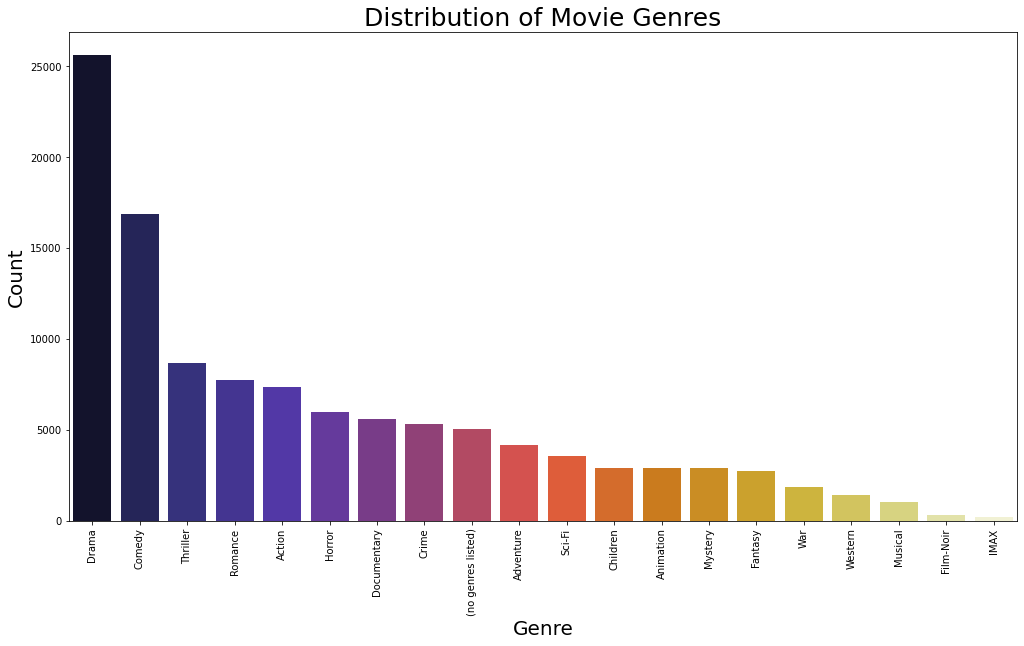

In [35]:
fig, ax = plt.subplots(figsize=(17, 9))
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

The top 3 most popular movie genres include drama, comedy and thriller. 
A Genre consists of four elements or parts: character, story, plot and setting. And often people will state that a particular movie had a good plot or an intriguing story. What people are referring to is that they enjoyed the characters, the problems/conflict the characters got into, and how the characters got out of the problems and conflict. The drama genre could be the most popular because it caters the character development in the plot, often overcoming dome form of challenge and conflicts, i.e. human struggles.  According to Hayley Mckenzie, drama delivers the emotional and relational development of realistic characters in a realistic setting. It offers intense character development and tells an honest story of human struggle. And this could be the possible reason why drama is a popular genre. 

### [Exploring the Movies data](#sub6)

In [36]:
movies=pd.merge(train_df, movies_df,on='movieId',how='inner')
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [37]:
full_movies = pd.merge(movies,imdb_df,on='movieId',how='inner')
full_movies.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [38]:
def top_n_plot_by_ratings(df,column, n):
    plt.figure(figsize=(17,9))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=25)
    plt.xlabel(column.title(), size=25)
    plt.ylabel('Number of Ratings', size=20)
    plt.xticks(rotation=90)
    plt.show()

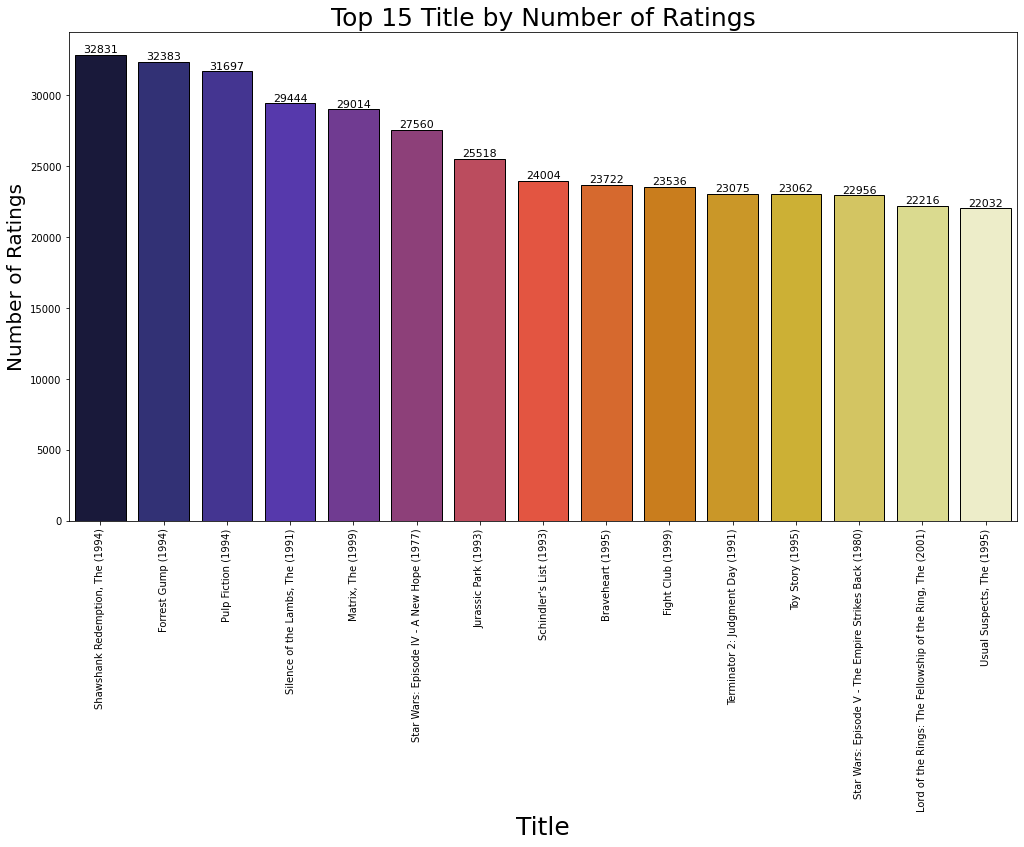

In [39]:
top_n_plot_by_ratings(movies,'title',15)

In the Top 15 Title by Number of Ratings bar graph, all the movies are prior the year 2001, with 14 of them released in the 19th century. 

The top three are Shawshank Redemption 1994, Forest Grump 1994 and Pulp Fiction 1994.  All three movies fall under the popular drama genre and are American.
The Shawshank Redemption is a 1994 American drama film written and directed by Frank Darabont, based on the 1982 Stephen King novella Rita Hayworth and Shawshank Redemption. 
Pulp Fiction is a 1994 American neo-noir black comedy crime film written and directed by Quentin Tarantino, who conceived it with Roger Avary.
Forrest Gump is a 1994 American romantic comedy-drama film directed by Robert Zemeckis and written by Eric Roth.

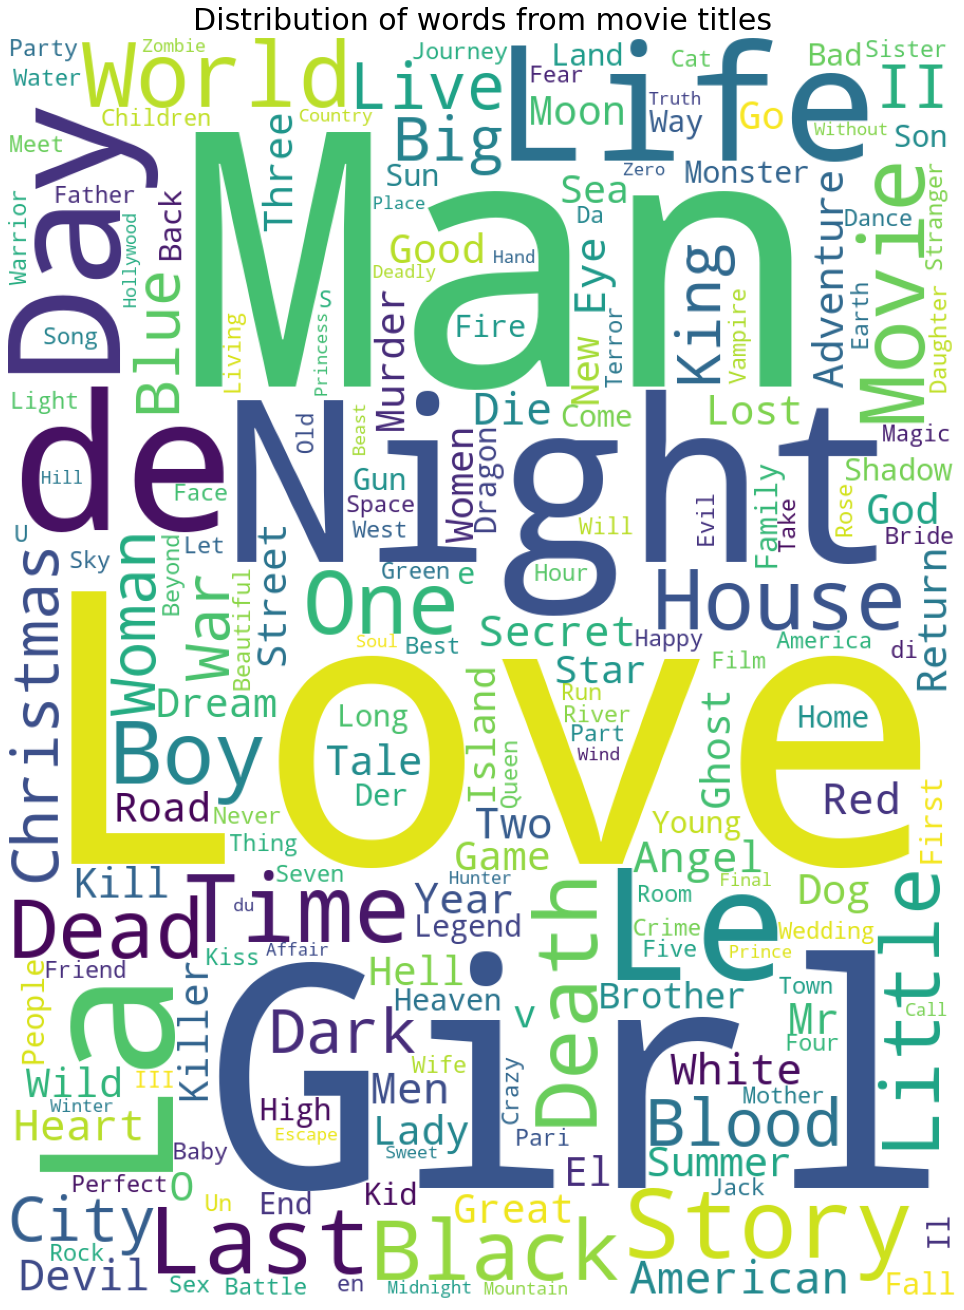

In [40]:
# Wordcloud of movie titles
movies_word = movies_df['title'] = movies_df['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'White',
                            height = 1200,
                            width = 900).generate(movies_wordcloud)
plt.figure(figsize = (14,18), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Distribution of words from movie titles', size=30)
plt.tight_layout(pad=0)
plt.show()

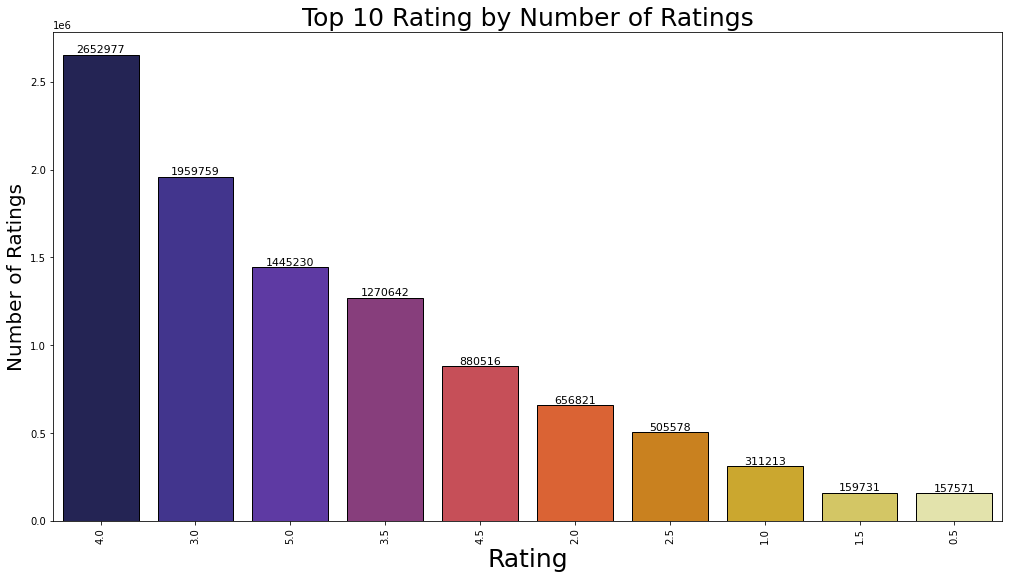

In [41]:
top_n_plot_by_ratings(movies,'rating',10)

The most common rating score that is give is 4.0, followed by 3.0. The least common score that is given by usrs is 0.5.

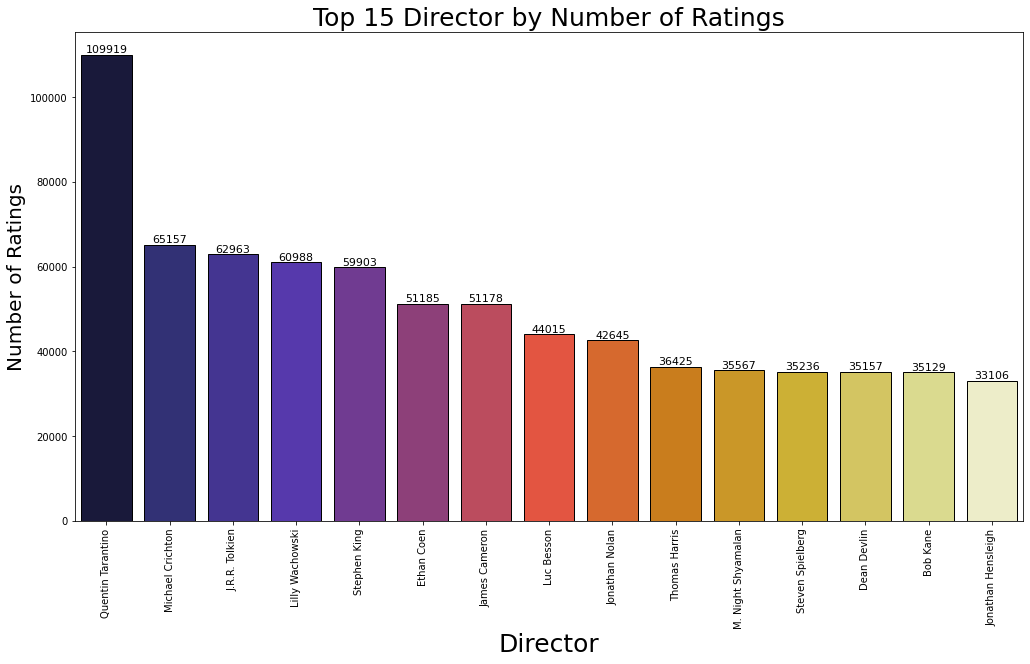

In [42]:
top_n_plot_by_ratings(full_movies,'director',15)

Quentin Tarantino is the top director of the number of ratings. Quentin Tarantino is one of the world's most renowned writer/directors. Each of his films is highly anticipated, as he draws upon the subjects and themes of previous films to produce a fresh storyline. Three of the most significant works from Quentin Tarantino are Reservoir Dogs, True Romance and Pulp Fiction. 


And as seen in the by the Top 15 Title by Number of Ratings graph, Pulp Fiction is one of the top 3 most voted films. 
For best director he was nominated for: 

1994	Pulp Fiction	Nominated

2009	Inglourious Basterds	Nominated

2019	Once Upon a Time in Hollywood	Nominated

Other competing directors include Michael Crichton and J.R.R. Tolkien. However, Quentin Tarantino does have a more considerable leading as compared to other directors in the graph. 

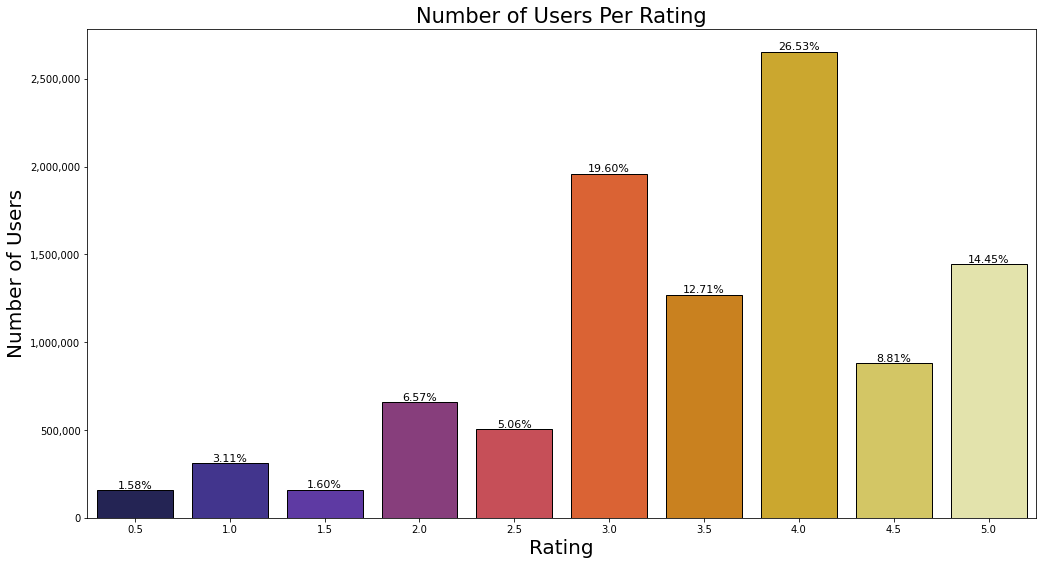

In [43]:
movieRatingDistGroup = train_df['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(17,9))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Rating", size=20)
ax.set_ylabel('Number of Users', size=20)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Number of Users Per Rating', fontsize=21)
plt.show()

Most of the users are weighted within the score range of 3.0 - 5.0, with the most users being weighted in the 4.0 score, accounting for 26.53% of the users. This indicates that most of the users give ratings above 2.5, and with fewer users giving a score of 0.5 which only only consists of 1.58% of the users. Similiarly with the score of 1.5 only accounting to 1.60% of users.

In [44]:
def count_directors(df, count = 10):
    """
    Function to count the most common dircetors in a DataFrame:
    Parameters
    ----------
        df (DataFrame): input dataframe containing imdb metadata
        count (int): filter directors with fewer than count films
        
    Returns
    -------
        directors (DataFrame): output DataFrame
    Examples
    --------
        >>> df = pd.DataFrame({'imdbid':[0,1,2,3,4,5], 'director': [A,B,A,C,B]})
        >>> count_directors(df, count = 1)
            |index|director|count|
            |0|A|2|
            |1|B|2|
            |2|C|1|
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [45]:
def feature_count(df, column):
    plt.figure(figsize=(17,9))
    ax = sns.barplot(x = df[f'{column}'], y= df['count'], palette='brg')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per {column}', fontsize=21)
    plt.xlabel(f'{column}', size=20)
    plt.ylabel('Count', size=20)
    plt.xticks(rotation=90)
    plt.show()

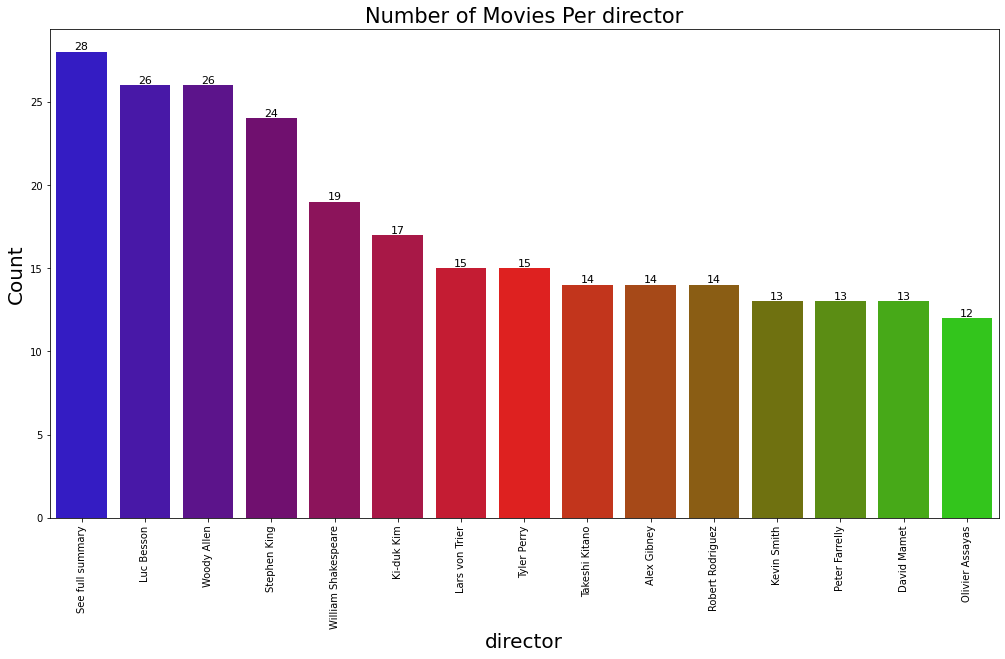

In [46]:
directors = count_directors(imdb_df)
feature_count(directors.head(15), 'director')

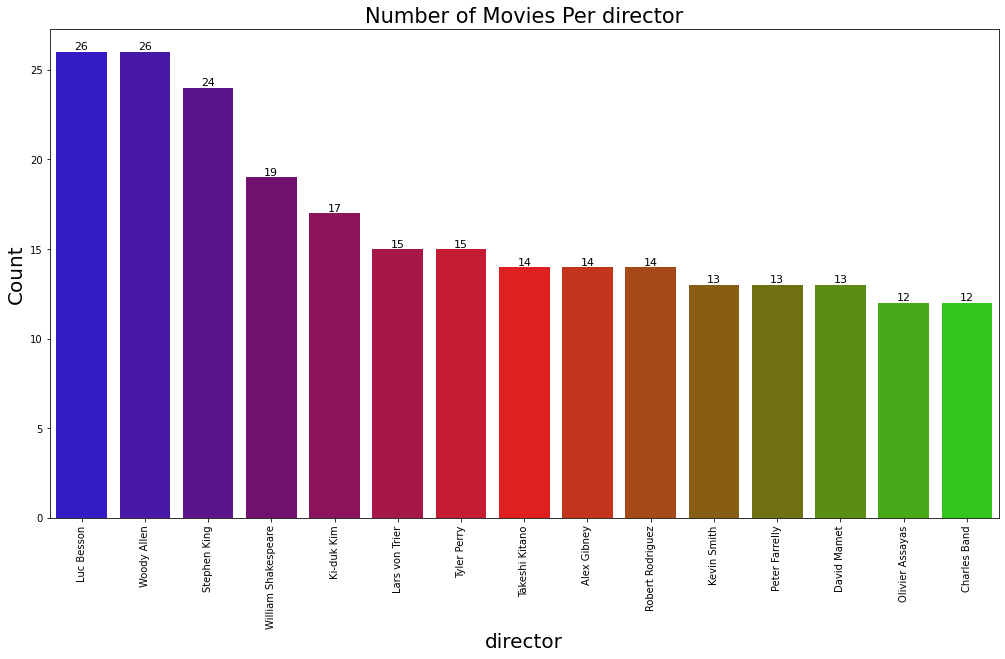

In [47]:
feature_count(directors[directors['director']!='See full summary'].head(15), 'director')

In the Number of Movies Per Director bar graph, the leading director who has produced the most movies is 'See full summary' with a count of 28. However, 'see the full summary' is not a director! 
Luc Besson and Woody Allen are tied with a value count of producing 26 movies and followed by Stephan King with 24.  They are the only producers in the dataset with over 20 movie productions. 

### [Word Clouds](#sub7)

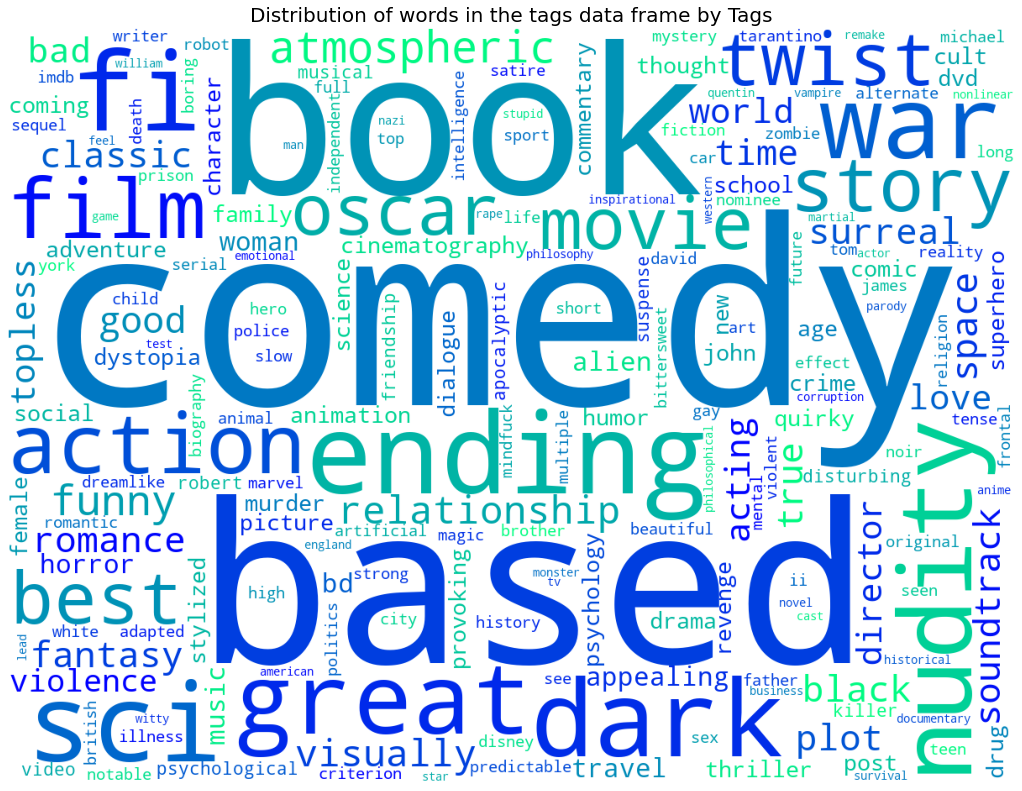

In [48]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tags_df['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1200, height=900,
                      colormap='winter',
                      background_color='white',
                      stopwords=stopwords,collocations=False,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(14, 18), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags', size=20)
plt.tight_layout(pad=0)

plt.show()


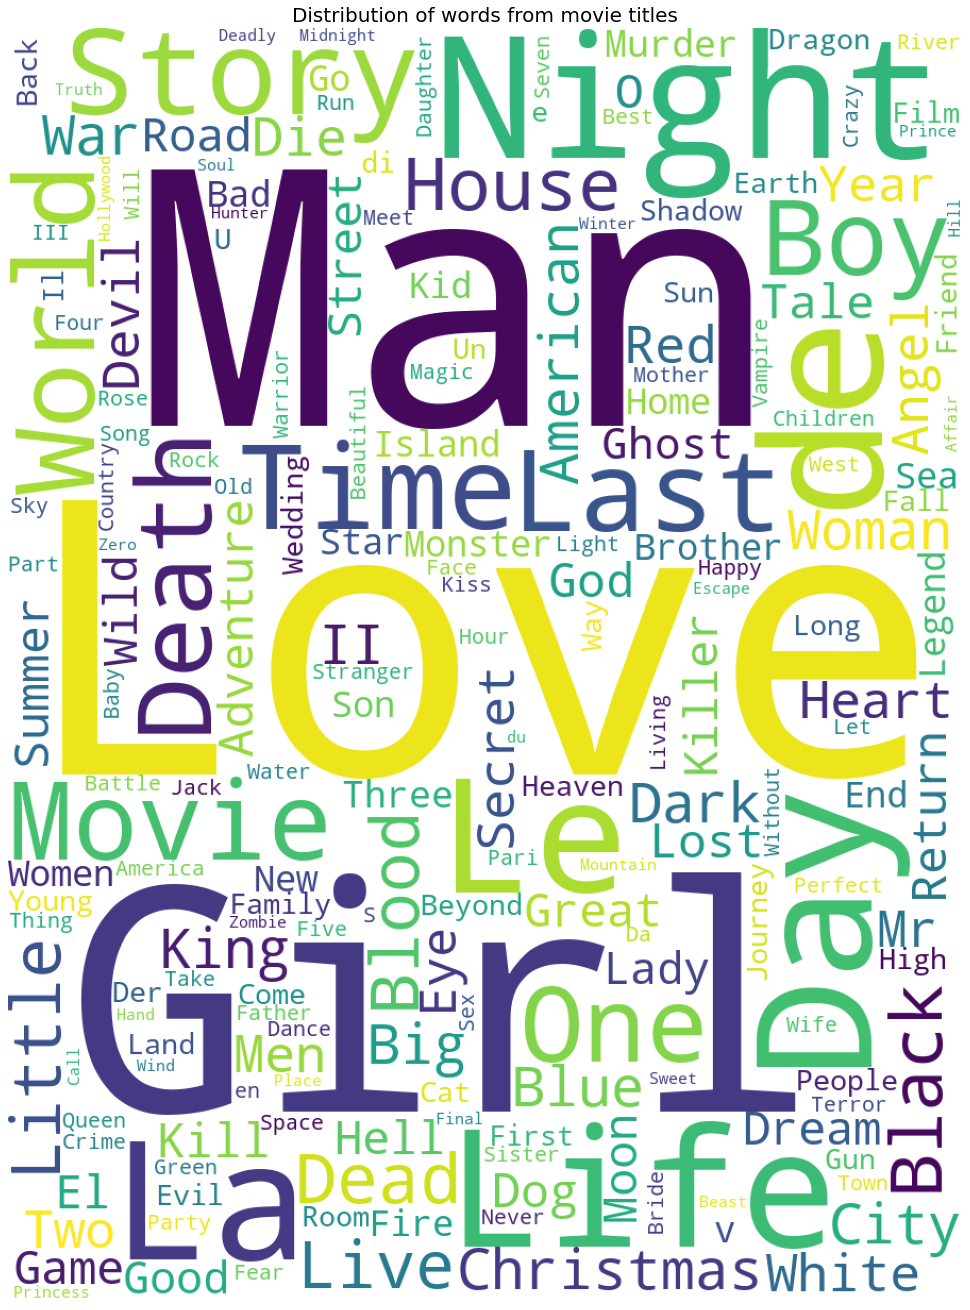

In [49]:
# Wordcloud of movie titles
movies_word = movies_df['title'] = movies_df['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'White',
                            height = 1200,
                            width = 900).generate(movies_wordcloud)
plt.figure(figsize = (14,18), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Distribution of words from movie titles', size=20)
plt.tight_layout(pad=0)
plt.show()

In [50]:
value_count = pd.DataFrame(tags_df['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)

In [51]:
value_count.head()

,genre,count
0,sci-fi,8330
1,atmospheric,6516
2,action,5907
3,comedy,5702
4,surreal,5326


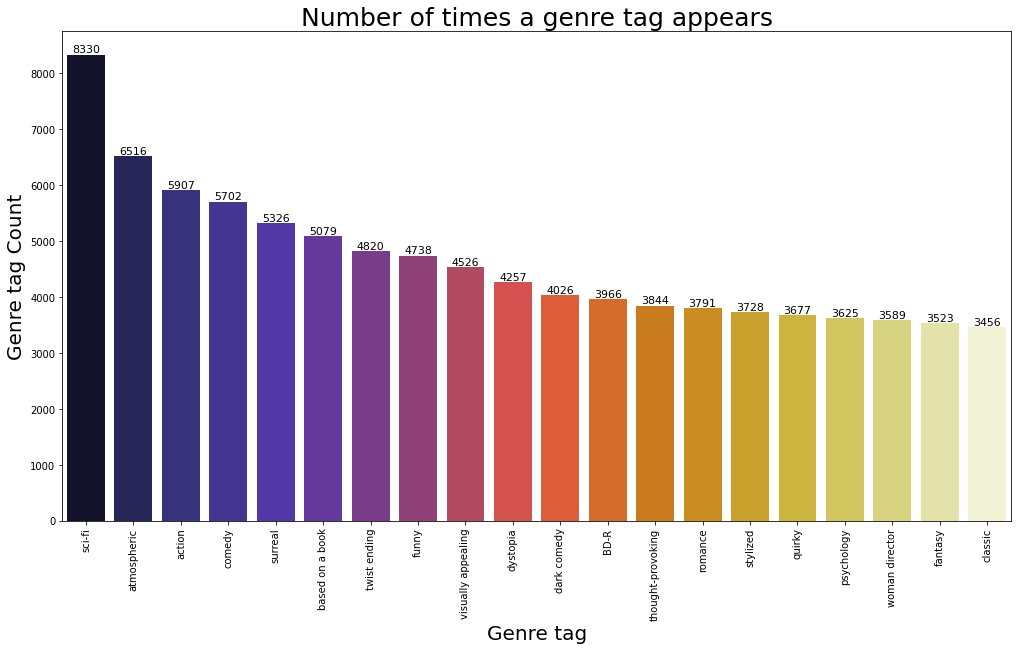

In [52]:
genre_count = value_count.head(20)
plt.figure(figsize=(17,9))
ax = sns.barplot(x = genre_count['genre'], y= genre_count['count'], palette='CMRmap')
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title('Number of times a genre tag appears', fontsize=25)
plt.xlabel('Genre tag', size=20)
plt.ylabel('Genre tag Count', size=20)
plt.xticks(rotation=90)
plt.show()

The most popular words in the world cloud include book, comedy, ending, based, dark and sci-fi.  
The three most popular genres that appear in tags_df('tags') are sci-fi, atmospheric, and action. The sci-fi genre is a speculative fiction that typically deals with imaginative and futuristic concepts such as advanced science and technology, space exploration, time travel, parallel universes, and extraterrestrial life.  While atmospheric films tap in the sentimental human memory may be portals to another time and space.  For instance, scenes that give an opportunity of temporal teleportation for the nostalgic visionary. The action genre has the protagonist or protagonists who thrust into a series of events that typically include violence, extended fighting, physical feats, rescues and frantic chases.

### [Release Years](#rel8)

In [53]:
dates = []
for title in movies_df['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

movies_df['Release Year'] = dates


In [54]:
dates = []
for title in movies_df['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

movies_df['Release Year'] = dates



In [55]:
len(movies_df)

62423

In [56]:
len(movies_df[movies_df['Release Year'] == 9999])

408

In [57]:
movies_df[(movies_df['Release Year'] > 1970) &
          (movies_df['Release Year'] < 2019)]

,movieId,title,genres,Release Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,2008
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018


In [58]:
dataset = pd.DataFrame(movies_df['Release Year'].
                       value_counts()).reset_index()
dataset.rename(columns={'index': 'year', 'Release Year': 'count'},
               inplace=True)
dataset.head()

,year,count
0,2015,2513
1,2016,2488
2,2014,2406
3,2017,2374
4,2013,2173


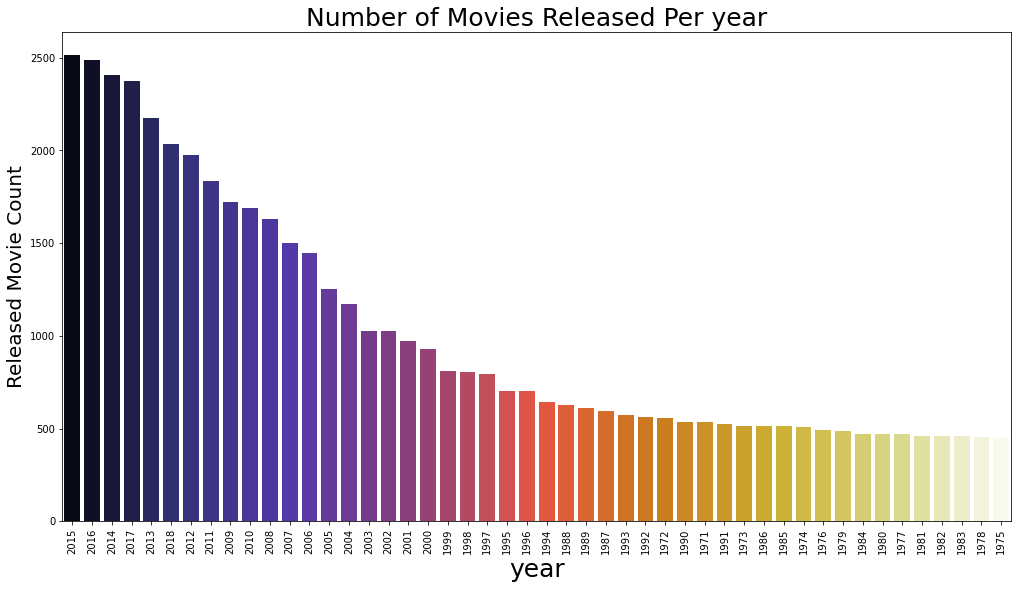

In [59]:
year_dataset = dataset[(dataset['year']>1970) & (dataset['year']<2019)].sort_values(by='count',ascending=False).head(50)
plt.figure(figsize=(17,9))
ax = sns.barplot(x = year_dataset['year'], y= year_dataset['count'], order=year_dataset['year'], palette='CMRmap')
#for p in ax.patches:
#       ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title('Number of Movies Released Per year', fontsize=25)
plt.xlabel('year', size=25)
plt.ylabel('Released Movie Count', size=20)
plt.xticks(rotation=90)
plt.show()

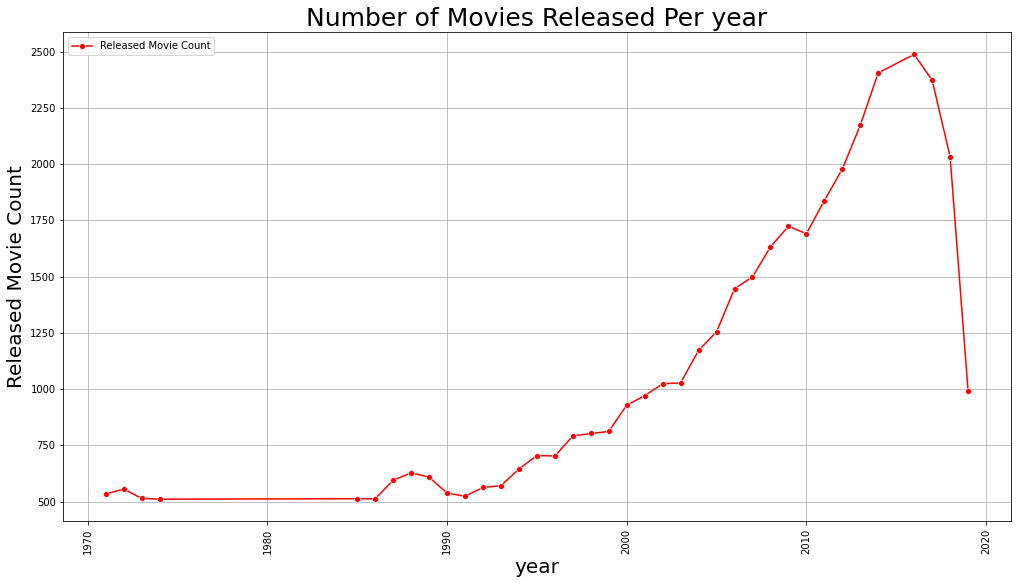

In [60]:
year_dataset = dataset[(dataset['count']>500) & (dataset['count']<2500)].sort_values(by='year',ascending=False).head(50)
x = year_dataset['year'] 
y = year_dataset['count']

plt.figure(figsize=(17,9))
ax = sns.lineplot(x, y,
         color='r',
         marker='o')
plt.title('Number of Movies Released Per year', fontsize=25)
plt.xlabel('year', size=20)
plt.ylabel('Released Movie Count', size=20)
plt.legend(['Released Movie Count'])
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In the Number of  Movies Released Per year graph, we are able to visually see an major increase in movie releases in the 21st century. 

# [4. Prepocessing](#prep)

## Multi-Dimensional Scaling 

Multidimensional scaling (MDS) is a technique for visualizing distances between objects on a map, where the distance is known between pairs of the objects.

In [61]:
def data_scaler(df):
    """
    Scales data.
    """
    scaler = StandardScaler(with_std=True)
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [62]:
scaled_genome = data_scaler(genome_score.sample(frac=0.0001))

In [63]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1)
tsne.fit(scaled_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1558 samples in 0.003s...
[t-SNE] Computed neighbors for 1558 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1558
[t-SNE] Computed conditional probabilities for sample 1558 / 1558
[t-SNE] Mean sigma: 0.107184
[t-SNE] Computed conditional probabilities in 0.040s
[t-SNE] Iteration 50: error = 89.7024307, gradient norm = 0.0000398 (50 iterations in 1.266s)
[t-SNE] Iteration 100: error = 89.7024307, gradient norm = 0.0000046 (50 iterations in 1.056s)
[t-SNE] Iteration 150: error = 89.7024307, gradient norm = 0.0000022 (50 iterations in 1.005s)
[t-SNE] Iteration 200: error = 89.7024307, gradient norm = 0.0000027 (50 iterations in 0.844s)
[t-SNE] Iteration 250: error = 89.7024307, gradient norm = 0.0000046 (50 iterations in 0.815s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.702431
[t-SNE] Iteration 300: error = 4.9903336, gradient norm = 0.0000079 (50 iterations in 0.799s)

TSNE(learning_rate=0.1, n_components=3, n_jobs=-1, perplexity=10, verbose=2)

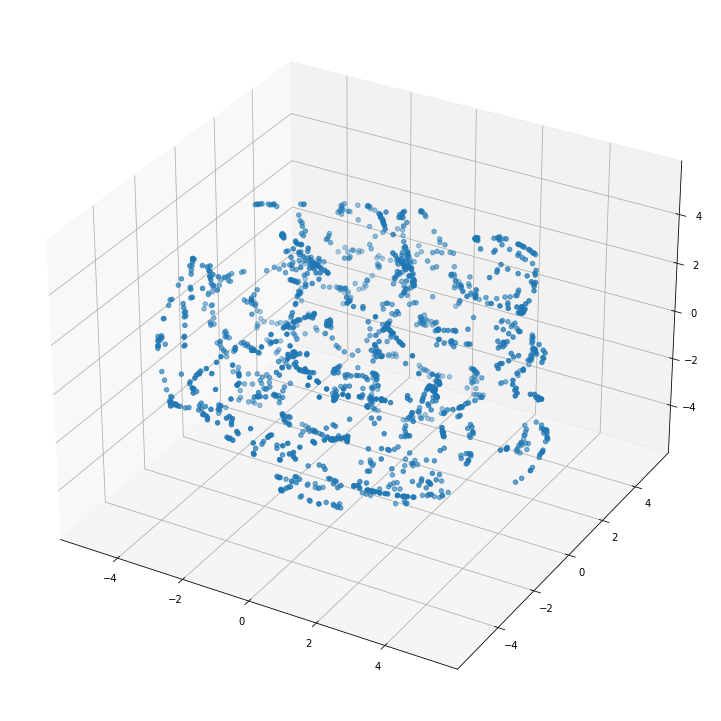

In [64]:
Axes3D

fig = plt.figure(figsize=(17, 13))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2])
plt.show()

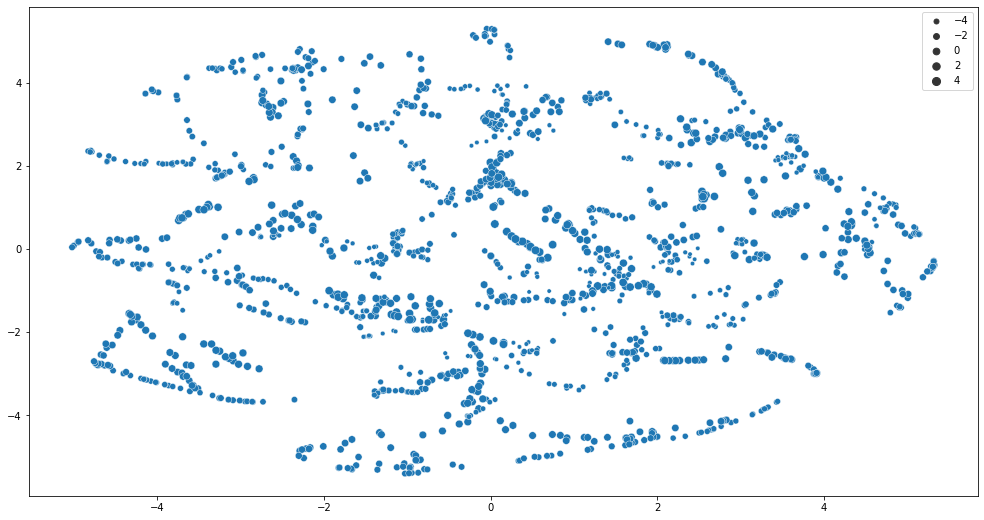

In [65]:
fig = plt.figure(figsize=(17, 9))
sns.scatterplot(x = tsne.embedding_[:,0], y = tsne.embedding_[:,1], size=tsne.embedding_[:,2])
plt.show()

In [6]:
# Below is the dataframe we will be altering.
working_train = train_df.drop(columns='timestamp')

In [7]:
df_work = working_train.set_index('movieId').join([movies_df[['movieId',
                                                           'genres']]
                                                   .set_index('movieId'),
                                                   imdb_df[['movieId',
                                                         'title_cast',
                                                         'director',
                                                         'plot_keywords']].
                                                   set_index('movieId')],
                                                  how='left').reset_index()
df_work.head()


,movieId,userId,rating,genres,title_cast,director,plot_keywords
0,1,158849,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,1,97203,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
2,1,161871,3.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
3,1,45117,4.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
4,1,27431,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation


In [8]:
def preprocessor_train(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imdb_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus', 'rating']]


In [9]:
def preprocessor_test(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imdb_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus']]

In [10]:
Test = preprocessor_test(test_df)

In [11]:
X = preprocessor_train(train_df.drop(columns=['timestamp'])) 


In [12]:
X1 = X.drop(columns=['rating', 'userId', 'movieId'])
T1 = Test.drop(columns=['userId', 'movieId'])


In [13]:
y = X['rating']

In [14]:
cv = CountVectorizer()
X_mat =cv.fit_transform(X1['corpus'])

In [15]:
Test_mat = cv.transform(T1['corpus'])

In [16]:
X_mat.shape

(10000038, 130227)

# [5. Modelling](#mod)

### [Content-Based Filtering Recommendation](#CB)

Collaborative filtering addresses some of the limitations of content-based filtering; collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.

#### Linear Regression Model
Simple linear regression is a statistical method that shows the relationship between two continuous variables. This is represented by a straight line with the equation:
$$ y = a + bx$$   
where $a$ is the intercept of the line with the y-axis, and $b$ is the gradient.  
The independent variable ($x$) is also known as the predictor and the dependent variable ($y$) is known as the target.

In [17]:
estimators2 = []
estimators2.append(('standardize',
                    StandardScaler(with_mean=False)))
estimators2.append(('mod',
                    LinearRegression()))
model = Pipeline(estimators2)
model.fit(X_mat, y)

Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                ('mod', LinearRegression())])

We merged each movie with its genre, casts, director and plot keywords.

We wanted to find out how similar the test movies are to any movie the user has rated before, then rate the 'test movie' by the highest similarity in any rating category.

Therefore, for each user, we categorised the movies viewers have watched by rating.

Results for the linear regression model predicted a RMSE of 1.06. We can conclude therefore that there are not enough variables to lower the RMSE though this still proved to be the best performing model for content based filtering.


**Content Based Recommendations Continued**. This section will present the initiation of content based filtering. The data used will include the text data and descriptions found in two data sets which include the df_imdb and the df_movies. The columns of interest from these two datasets include title_cast, director, plot_keywords and genres. A number of data preprocessing steps will have to be followed before the data will be suitable for use. This section will detail these steps and produce a content based recommender. 

In [6]:
# A quick observation of the two  dataset to be used 
imdb_df.head() 

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The first step would be to merge these two data frames.

In [8]:
#Join df_imdb and df_movies datasets 
imbd_movie = imdb_df.merge(movies_df, on='movieId')
#Show text data to be used for analysis 
imbd_movie[['title', 'title_cast', 'director', 'plot_keywords', 'genres']].head()

,title,title_cast,director,plot_keywords,genres
0,Toy Story (1995),Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance
3,Waiting to Exhale (1995),Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy


The data set contains a number of missing values. These missing values were filled with a filler string. 

In [9]:
#Fill NaN for each value with a corresponding filling string
imbd_movie['title_cast'].fillna('no title_cast listed',inplace=True)
imbd_movie['plot_keywords'].fillna('no plot_keywords listed ',inplace=True)
imbd_movie['director'].fillna('no director listed',inplace=True)

In the following cells the title_cast, plot_keywords and genres columns will be reworked to remove the pipes between words and replace the cells with lists of the given words instead.


In [10]:
#Initiatlise the empty list 'plot_key'
plot_key = []
#Iterate through the 'plot_keywords' column
for i in imbd_movie['plot_keywords']:
#Split the plot keyword on the '|' character and append the list of words to the empty list
    plot_key.append(i.split('|'))

In [11]:
#Update the column with the new plot_keys seperated into a list
imbd_movie['plot_keywords'] = plot_key

In [12]:
#Initiatlise the empty list 'title_cast'
title_cast = []
#Iterate through the 'title_cast'' column
for i in imbd_movie['title_cast']:
#Split the plot keyword on the '|' character and append the list of words to the empty list
    title_cast.append(i.split('|'))

In [13]:
#Update the column with the new title_cast seperated into a list
imbd_movie['title_cast'] = title_cast

In [14]:
#Initiatlise the empty list 'genre_list'
genre_list = []
#Iterate through the 'genres' column
for i in imbd_movie['genres']:
#Split the plot keyword on the '|' character and append the list of words to the empty list
    genre_list.append(i.split('|'))

In [15]:
#Update the column with the new genre seperated into a list
imbd_movie['genres'] = genre_list

Now we can view the cells with the pipes removed and the given words placed in lists.


In [16]:
#View of reworked dataset
imbd_movie[['title', 'title_cast', 'director', 'plot_keywords', 'genres']].head()

,title,title_cast,director,plot_keywords,genres
0,Toy Story (1995),"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[toy, rivalry, cowboy, cgi animation]","[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,"[board game, adventurer, fight, game]","[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,"[boat, lake, neighbor, rivalry]","[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,"[black american, husband wife relationship, be...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,"[fatherhood, doberman, dog, mansion]",[Comedy]


Moving on, all of the text will be made into lowercase and names and surnames would be joined together. This will be done to differentiate between different people.

In [17]:
def string_function(x):
    """merges name and surname into one name"""
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [18]:
features = ['title_cast','director','plot_keywords','genres']

for feature in features:
    imbd_movie[feature] = imbd_movie[feature].apply( string_function)

Now we can create a single sentence which contains the plot_keywords, title_cast, director and genres to be fed into the vectorizer.

In [19]:
def create_sentence(x):
    return ' '.join(x['plot_keywords']) + ' ' + ' '.join(x['title_cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
imbd_movie['sentence'] = imbd_movie.apply(create_sentence, axis=1)

In [20]:
imbd_movie.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,sentence
0,1,"[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgianimation]",Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",toy rivalry cowboy cgianimation tomhanks timal...
1,2,"[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,104.0,"$65,000,000","[boardgame, adventurer, fight, game]",Jumanji (1995),"[adventure, children, fantasy]",boardgame adventurer fight game robinwilliams ...
2,3,"[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",Grumpier Old Men (1995),"[comedy, romance]",boat lake neighbor rivalry waltermatthau jackl...
3,4,"[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,124.0,"$16,000,000","[blackamerican, husbandwiferelationship, betra...",Waiting to Exhale (1995),"[comedy, drama, romance]",blackamerican husbandwiferelationship betrayal...
4,5,"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]",Father of the Bride Part II (1995),[comedy],fatherhood doberman dog mansion stevemartin di...


The next step requires us to vectorise the sentence column. For this we will use the CountVectorizer().

In [21]:
#  Create the count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(imbd_movie['sentence'])

After vactorizing the data, the cosine similarity is calculated. Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are similar. It is often used to measure document similarity in text analysis.

In [22]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [23]:
imbd_movie = imbd_movie.reset_index()
indices = pd.Series(imbd_movie.index, index=imbd_movie['title'])

Now that all the data has been cleaned, the recommendation function can be defined. 

In [24]:
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return imbd_movie['title'].iloc[movie_indices]

The function is now ready to be used to make a recommendation.

In [25]:
# Get similar movies 
get_recommendations('American Beauty (1999)', cosine_sim)

881     Breakfast at Tiffany's (1961)
891                 Casablanca (1942)
911     Affair to Remember, An (1957)
935             Penny Serenade (1941)
953                    Algiers (1938)
1195            Quiet Man, The (1952)
1253         Somewhere in Time (1980)
1257    Some Kind of Wonderful (1987)
1262       Room with a View, A (1986)
1271              Paris, Texas (1984)
Name: title, dtype: object

### [Collaborative-Based Filtering Reccomendation](#CB1)
Collaborative filtering addresses some of the limitations of content-based filtering; collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.

In [26]:
# Load the 10m dataset
train_df.drop('timestamp', axis=1)
train_subset = train_df[:10000000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.01, random_state=42)

#### Non-Negative Matrix Factorization Algorithm

Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements.

In [27]:
nmf_model = NMF(n_epochs=50, n_factors=160, random_state=42,verbose=True)
nmf_model.fit(trainset)
nmf_predictions =nmf_model.test(testset)
nmf_rmse = accuracy.rmse(nmf_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 1.15

#### SlopeOne Algorithm

Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms

In [28]:
slo_model = SlopeOne()
slo_model.fit(trainset)
slo_predictions = slo_model.test(testset)
slo_rmse=accuracy.rmse(slo_predictions)

RMSE: 1.1725


#### CoClustering Algorithm

Biclustering, block clustering , co-clustering, or two-mode clustering is a data mining technique which allows simultaneous clustering of the rows and columns of a matrix. The term was first introduced by Boris Mirkin to name a technique introduced many years earlier, in 1972, by J. A. Hartigan.

In [29]:
cc_model = CoClustering(n_epochs=50, random_state=42)
cc_model.fit(trainset)
cc_predictions = cc_model.test(testset)
cc_rmse=accuracy.rmse(cc_predictions)

RMSE: 1.1319


#### Singular Value Decomposition (SVD)

The singular value decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular values. The SVD allows us to discover some of the same kind of information as the eigendecomposition.The SVD is used widely both in the calculation of other matrix operations, such as matrix inverse, but also as a data reduction method in machine learning. SVD can also be used in least squares linear regression, image compression, and denoising data.

In [30]:
svd_model = SVD(n_epochs=50,n_factors=160,init_std_dev=0.001,random_state=42,verbose=True)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.95

#### Singular Value Decomposition plus-plus (SVDpp)

The SVD++ algorithm, an extension of SVD taking into account implicit ratings.

In [31]:
svdpp_model = SVDpp(n_epochs=50,n_factors=160,init_std_dev=0.001,random_state=42, verbose=True)
svdpp_model.fit(trainset)
svdpp_predictions = svdpp_model.test(testset)
svdpp_rmse = accuracy.rmse(svdpp_predictions)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 20
 processing epoch 21
 processing epoch 22
 processing epoch 23
 processing epoch 24
 processing epoch 25
 processing epoch 26
 processing epoch 27
 processing epoch 28
 processing epoch 29
 processing epoch 30
 processing epoch 31
 processing epoch 32
 processing epoch 33
 processing epoch 34
 processing epoch 35
 processing epoch 36
 processing epoch 37
 processing epoch 38
 processing epoch 39
 processing epoch 40
 processing epoch 41
 processing epoch 42
 processing epoch 43
 processing epoch 44
 processing epoch 45
 processing epoch 46
 processing epoch 47
 p

#### BaselineOnly algorithm

Algorithm predicting the baseline estimate for given user and item.

In [32]:
bsl_options = {'method': 'sgd','n_epochs': 50}
blo_model = BaselineOnly(bsl_options=bsl_options,verbose=True)
blo_model.fit(trainset)
blo_predictions = blo_model.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(blo_predictions)

Estimating biases using sgd...
RMSE: 0.9558


# [6. Evaluation](#eva)

We built and tested six different collaborative filtering models and compared their performance using a statistical measure known as the root mean squared error (**RMSE**), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$   

In [33]:
rmse_scores =[nmf_rmse,slo_rmse,cc_rmse,svd_rmse,svdpp_rmse,blo_rmse]
models =['NMF','SlopeOne','CoClustering','SVD','SVD++','BaselineOnly']

accuracy_data = pd.DataFrame({'model':models,'RMSE':rmse_scores})

In [34]:
accuracy_data.sort_values(by='RMSE')

,model,RMSE
5,BaselineOnly,0.955781
3,SVD,0.955785
4,SVD++,0.959977
2,CoClustering,1.131931
0,NMF,1.155296
1,SlopeOne,1.172476


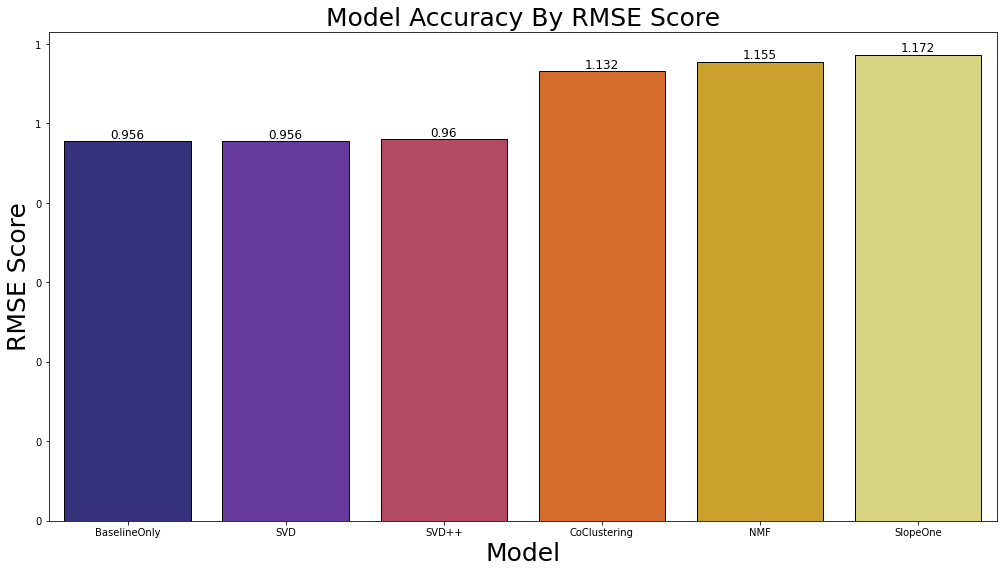

In [35]:
fig, ax = plt.subplots(figsize=(17,9))
sns.barplot(data=accuracy_data.sort_values(by='RMSE'), x='model', y='RMSE', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Model", size=25)
ax.set_ylabel('RMSE Score', size=25)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=25)
plt.show()

###  Model Explainability and Interpretability

In the context of machine learning and artificial intelligence, <b>explainability</b> and <b>interpretability</b> are often used interchangeably. While they are very closely related, it’s worth unpicking the differences, if only to see how complicated things can get once you start digging deeper into machine learning systems.

<b>Interpretability</b> is about the extent to which a cause and effect can be observed within a system. Or, to put it another way, it is the extent to which you are able to predict what is going to happen, given a change in input or algorithmic parameters. It’s being able to look at an algorithm and go yep, I can see what’s happening here.

<b>Explainability</b>, meanwhile, is the extent to which the internal mechanics of a machine or deep learning system can be explained in human terms. 

It’s easy to miss the subtle difference with interpretability, but consider it like this: interpretability is about being able to discern the mechanics without necessarily knowing why. Explainability is being able to quite literally explain what is happening.

### [Hyperparameter Tuning](#HPT)

In [36]:
# Hypertuning Singular Value Decomposition
trainset, testset = train_test_split(data, test_size=.001, random_state=42)

# Modelling of the SVD hypertuning
svd_algo_hyper = SVD(lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=100,
                     init_std_dev=0.01)
svd_algo_hyper.fit(trainset)

# Predicting on the validation set
svd_hyper_predictions = svd_algo_hyper.test(testset)

# Convert the predictions to dataframe
accuracy.rmse(svd_hyper_predictions)

RMSE: 0.9636


0.9636496694294435

In [37]:
pred_svd_hyper = [svd_algo_hyper.predict(row.userId,
                                         row.movieId) for idx,row in test_df.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)

# [7. Submission](#sub)

In [38]:
# Rename the fields in the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper = test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

,userId,movieId,rating
0,1,2011,3.543972
1,1,4144,4.176655
2,1,5767,3.533504
3,1,6711,3.856203
4,1,7318,2.620028


Concatenate each userId and movieId into a single Id column for submission

In [39]:
test_pred_svd_hyper['Id'] =  test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [40]:
svd_hyper_predictions = test_pred_svd_hyper[['Id','rating']]
svd_hyper_predictions.head()

,Id,rating
0,1_2011,3.543972
1,1_4144,4.176655
2,1_5767,3.533504
3,1_6711,3.856203
4,1_7318,2.620028


In [41]:
svd_hyper_predictions.to_csv('svd_submission.csv', index=False)

# [8. Conclusion](#con)

The model that performed the best is the Singular Value Decomposition (SVD) with the least Root Mean Square Error (RMSE) and after performing Hypertuning the Root Mean Square Error (RMSE) improved.

The SVD model has the following benefits simplifies data, removes noise, may improve algorithm results

Predicting the best outcome can help business's increase their revenue.

### [Pickle File](#pic)

In [42]:
model_save_path = "svd_algo_hyper.pkl"

with open(model_save_path, "wb") as file: 
    pickle.dump(svd_algo_hyper, file)

In [43]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/mathew-van-wyk/movie-recommendation-challenge/9f45a151d71440c58ae69b1049760122
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: Still uploading 2 fil